# 패키지 로딩

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd


# 데이터 로딩

In [3]:
X, y = load_iris(return_X_y=True)

# 데이터 표준화

In [4]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(X)

# 주성분 분석
- 4차원 -> 2차원 축소

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


# 주성분 값 확인

In [6]:
df_iris_pca = pd.DataFrame(iris_pca, columns=['PCA1','PCA2'])
df_iris_pca['class'] = y

df_iris_pca.head()

,PCA1,PCA2,class
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


# 2개 차원으로 데이터 시각화

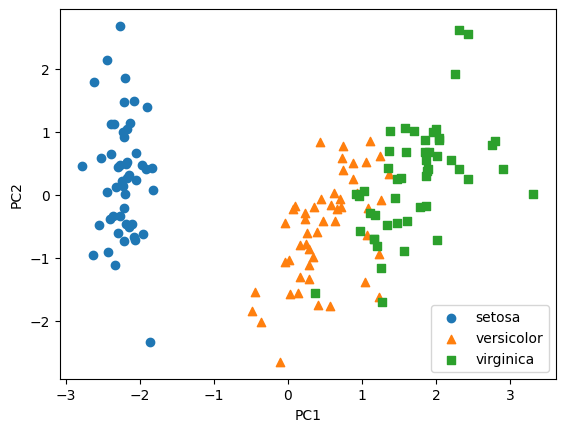

In [7]:
import matplotlib.pyplot as plt

plt.style.use('default')
marker = ['o','^','s']
for i,m in enumerate(marker):
    x_data = df_iris_pca[df_iris_pca['class']== i]['PCA1']
    y_data = df_iris_pca[df_iris_pca['class']== i]['PCA2']
    plt.scatter(x_data,y_data,marker=m,label=load_iris().target_names[i])

plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- (비교 참고) 꽃받침의 넓이와 길이 데이터로 시각화

In [8]:
iris_df = pd.DataFrame(X[:,[0,1]], columns=load_iris().feature_names[:2])
iris_df['class'] = y
iris_df.head()

,sepal length (cm),sepal width (cm),class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


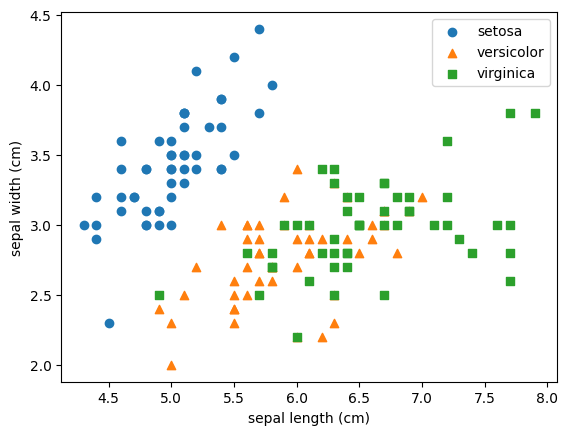

In [9]:
import matplotlib.pyplot as plt

plt.style.use('default')
marker = ['o','^','s']
for i,m in enumerate(marker):
    x_data = iris_df[iris_df['class']== i]['sepal length (cm)']
    y_data = iris_df[iris_df['class']== i]['sepal width (cm)']
    plt.scatter(x_data,y_data,marker=m,label=load_iris().target_names[i])

plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

# PCA에 따른 각각의 PC가 차지하는 변동성(분산) 비율 확인

In [10]:
print(pca.explained_variance_ratio_)
print(f'분산 합계:{np.sum(pca.explained_variance_ratio_):.3f}%')

[0.72962445 0.22850762]
분산 합계:0.958%


# 적절한 차원수 선택하기


In [19]:
pca = PCA() # 기본생성자를 이용해서 PCA를 실행하면 원 데이터의 차원수 만큼 PC를 생성한다
pca.fit(iris_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)
pc_num = np.argmax(cumsum >= 0.95) + 1
print(pc_num)

[0.72962445 0.95813207 0.99482129 1.        ]
2


# PCA 성능 비교

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model1 = RandomForestClassifier(random_state=10)
score = cross_val_score(model1, iris_scaled,y,scoring='accuracy', cv = 5)
print('교차 검증 정확도:',score)
print(f'교차 검증 평균 정확도:{np.mean(score):.3f}')

교차 검증 정확도: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
교차 검증 평균 정확도:0.960


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model2 = RandomForestClassifier(random_state=10)
score = cross_val_score(model2, iris_pca,y,scoring='accuracy', cv = 5)
print('교차 검증 정확도:',score)
print(f'교차 검증 평균 정확도:{np.mean(score):.3f}')
s

교차 검증 정확도: [0.83333333 0.93333333 0.83333333 0.86666667 0.96666667]
교차 검증 평균 정확도:0.887
